# LangGraph Overview

## What is LangGraph?

LangGraph is an advanced framework for LLM applications. it represents the Workflow as a *graph* of nodes connected with edges.

LangGraph is a framework (part of the LangChain ecosystem) for orchestrating workflows of agents (LLMs + tools), especially when you need:

- **Stateful**, long‑running interactions, 
- **State Management** (memory management)
- **Multiple actors/agents** working together  
- **Conditional logic / loops / branching** in workflows  
- Human‑in‑the‑loop checkpoints & control

It extends LangChain by allowing more complex control flow than simple linear “chains”, enabling workflows that are graph‑structured (not just a chain/DAG) with cycles and persistent state.

---

## Pros & Cons of LangGraph

| **Pros** | **Cons** |
|-----------|-----------|
| **Expressiveness / Flexibility**: Build complex workflows with branching, loops, multiple agents, etc. | **Steep Learning Curve & Complexity**: Managing many nodes, edges, and states adds cognitive load. |
| **State Management** (memory management): Persistent context across long interactions; supports remembering history and passing state through graph. | **Overhead / Performance**: More orchestration can mean slower performance and harder debugging. |
| **Multi‑Agent & Modularity**: Different agents (or nodes) can do different roles; easy integration of tools, APIs, and vector DBs. | **Documentation / Maturity Issues**: Some docs are incomplete; community best practices are still evolving. |
| **Observability & Control**: Human‑in‑the‑loop checkpoints, moderation checks, streaming outputs, and auditability. | **Overkill for Simple Use Cases**: For simple chatbots or QA, the complexity may not be worth it. |

---

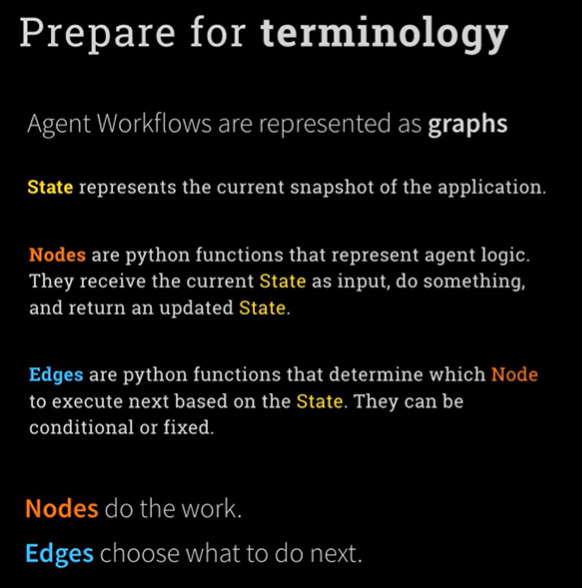

## Detailed Structure of LangGraph

LangGraph’s **core idea** is that an LLM application isn’t always a simple sequence of steps — it’s often a **graph** of interacting components (agents, tools, conditions, loops, and humans).  
LangGraph provides a **graph runtime** that manages state, control flow, and persistence between these components.

---

#### 🕸️ 1. Graph: The Core Abstraction

At its heart, the core idea of LangGraph is that it represents a **workflow as a graph**:

- **Nodes:** Units of work — each node performs a specific task (e.g., calling an LLM, running a tool, checking output quality).  
- **Edges:** Define transitions or relationships between nodes, determining what happens next based on outputs or conditions.  
- **Graph Execution:** The graph can include:
  - **Branches** (conditional logic)
  - **Cycles** (loops)
  - **Parallel paths** (multiple nodes running independently)

Unlike traditional DAG-based workflow engines, LangGraph supports **stateful cycles**, allowing revisiting nodes with updated state.

---

#### 🧩 2. Nodes and Subgraphs

Each **node** is a python function (a callable component). inside the function, it can be:
- read/write data
- An **LLM agent**
- Another **LangGraph** (nested or subgraph)
- Using a **tool** (API call, database query, VDB call, mcp server call, or function)
- A **human approval step**

**Subgraphs** are reusable workflows that can be composed into larger graphs — similar to microservices for reasoning.

---

#### 🔄 3. State Management
**Definition of state**:
In LangGraph, the state is a data object that represents the <u> current memory or context of your workflow — what the system knows at any given moment.</u> <br>
It is persistent and shared across all nodes in the graph.<br>
You can think of it as the single source of truth for all information that flows through your LLM workflow.

LangGraph is **stateful**, unlike many orchestration systems.

- Each node reads and writes to a **shared state object**.
- The state holds:
  - User inputs
  - Intermediate outputs
  - Memory context (conversation history, retrieved documents, etc.)
  - Execution metadata (timestamps, tokens used, etc.)
- The system supports **checkpointing** — saving partial states to pause, resume, or inspect workflows.

**Example:**

```python
state = {
    "user_query": "Summarize this PDF",
    "retrieved_docs": [...],
    "summary": "..."
}
```

This enables long-running, resumable workflows and human-in-the-loop checkpoints.

---

#### ⚙️ 4. Control Flow and Logic

LangGraph supports **dynamic decision-making** during execution:

- **Conditional Edges:** Decide which node to run next based on state or output.  
  ```python
  if "error" in result:
      next_node = "ErrorHandler"
  else:
      next_node = "Summarizer"
  ```

- **Loops / Iterations:** Repeat a node or subgraph until a condition is met, such as refining output until confidence > 0.8.

This allows fine-grained control similar to programming logic, but at a higher level.

---

#### 🧠 5. Multi-Agent and Tool Integration

LangGraph naturally supports **multi-agent systems**:

- Each agent can have its own role, memory, and decision policy.
- Agents communicate through shared state.

**Common setup:**
- **Planner Agent:** Determines next steps.
- **Worker Agent:** Executes specific tasks.
- **Reviewer Agent:** Evaluates or moderates outputs.

LangGraph also integrates with tools:
- APIs (e.g., Google Search, Zapier)
- Databases
- Vector stores for **Retrieval-Augmented Generation (RAG)**

Each integration lives in its own node, ensuring modularity and easier debugging.

---

#### 👁️ 6. Observability and Human-in-the-Loop

LangGraph supports **observability** and **human intervention**:

- Define checkpoints where human feedback or moderation is required.
- Visualization tools (e.g., LangGraph Studio) provide:
  - Node-level input/output tracing
  - State evolution inspection
  - Workflow replay/debugging

This is essential for enterprise or regulated AI systems needing **transparency and auditability**.

---

#### 🚀 7. Runtime and SDK Architecture

LangGraph offers SDKs for **Python** and **JavaScript**:

- Define graphs declaratively or programmatically.
- Support **asynchronous execution** for scalability.
- The **LangGraph Platform** manages deployment, scaling, and state persistence.

The runtime manages:
- Dependency resolution
- Parallel execution
- Checkpointing
- Event streaming for real-time monitoring

---

#### 🧭 8. Example Visual Model

```
         ┌──────────────┐
         │  User Input  │
         └──────┬───────┘
                │
                ▼
        ┌──────────────┐
        │ Planner Node │───┐
        └──────┬───────┘   │
               │            ▼
        ┌──────────────┐  ┌──────────────┐
        │ Search Tool  │  │ Summarizer   │
        └──────┬───────┘  └──────┬──────┘
               │                 │
               └─────►┌──────────▼─────────┐
                      │   Evaluator Node   │
                      └─────────┬──────────┘
                                │
                                ▼
                        ┌──────────────┐
                        │ Final Output │
                        └──────────────┘
```

Each box represents a **node**, and arrows represent **control flow**.

---

#### 🧾 Summary Table

| **Component** | **Purpose** |
|----------------|-------------|
| **Graph** | Defines overall workflow topology |
| **Node** | Atomic operation (LLM, tool, or function) |
| **Edge** | Control flow / transition between nodes |
| **State** | Shared memory across nodes |
| **Subgraph** | Nested reusable workflow |
| **Control Flow** | Conditional & iterative logic |
| **Runtime** | Executes and manages the graph |
| **Checkpoints** | Save/restore state for resilience |
| **Visualization** | Debug, trace, and audit workflow |

---

**In short:**  
LangGraph structures an LLM workflow as a living, stateful, and observable graph — where each node is a reasoning or action unit, and the entire graph represents intelligent, adaptive behavior.
